In [76]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import numpy as np
from collections import defaultdict
from scipy import stats

cid ="baca9371d5f8409a85ffee343639df22" 
secret = "75d20d82245b445882cafae68e3442aa"

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{Tyler,the Creator}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'},
  'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF',
  'id': '4V8LLVI7PbaPR0K2TGSxFF',
  'name': 'Tyler, The Creator',
  'type': 'artist',
  'uri': 'spotify:artist:4V8LLVI7PbaPR0K2TGSxFF'}]

In [2]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:5zi7WsKlIiUXv09tbGLKsE',
 'spotify:album:2nkto6YNI4rUYTLqEwWJ3o',
 'spotify:album:621OhgnZJ7Pz8iUazct1In',
 'spotify:album:5V3Chnpno9oTI7JSPXKUf3',
 'spotify:album:6hSjwUPL9jSBtZPgyFWfjI',
 'spotify:album:40QTqOBBxCEIQlLNdSjFQB',
 'spotify:album:40ucxnGO51wcTGNI6xge6z',
 'spotify:album:7tjZ51DOxwxIcnY20ThkaV',
 'spotify:album:1YVf1gCvpUKr0YGtgFVmfm',
 'spotify:album:2gZGyIkGCLR5bCBud4ADl9']

In [3]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [4]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album IGOR songs has been added to spotify_albums dictionary
Album Flower Boy songs has been added to spotify_albums dictionary
Album Cherry Bomb songs has been added to spotify_albums dictionary
Album Cherry Bomb + Instrumentals songs has been added to spotify_albums dictionary
Album Live At Splash! songs has been added to spotify_albums dictionary
Album Wolf songs has been added to spotify_albums dictionary
Album Goblin (Deluxe Edition) songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary


In [5]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [6]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 29.80193829536438 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 54.74015021324158 seconds


In [7]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

180

In [17]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,IGOR,1,51RN0kzWd7xeR4th5HsEtW,IGOR'S THEME,spotify:track:51RN0kzWd7xeR4th5HsEtW,0.005590,0.467,0.672,0.243000,0.6070,-7.371,0.3770,163.100,0.0648,71
1,IGOR,2,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,spotify:track:5hVghJ4KaYES3BFUATCYn0,0.230000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,0.4130,86
2,IGOR,3,4f8Mh5wuWHOsfXtzjrJB3t,I THINK,spotify:track:4f8Mh5wuWHOsfXtzjrJB3t,0.008810,0.826,0.579,0.000000,0.1290,-8.241,0.0801,121.075,0.4310,77
3,IGOR,4,5e4LIAQI0bClLazNf2gZV0,EXACTLY WHAT YOU RUN FROM YOU END UP CHASING,spotify:track:5e4LIAQI0bClLazNf2gZV0,0.927000,0.000,0.478,0.000000,0.3350,-16.569,0.0000,0.000,0.0000,7
4,IGOR,5,5QvBXUm5MglLJ3iBfTX2Wo,RUNNING OUT OF TIME,spotify:track:5QvBXUm5MglLJ3iBfTX2Wo,0.296000,0.360,0.391,0.000406,0.1290,-10.600,0.0528,84.281,0.1620,73
5,IGOR,6,0fv2KH6hac06J86hBUTcSf,NEW MAGIC WAND,spotify:track:0fv2KH6hac06J86hBUTcSf,0.096700,0.621,0.730,0.000131,0.6730,-5.414,0.1070,139.566,0.4640,72
6,IGOR,7,1nXZnTALNXiPlvXotqHm66,A BOY IS A GUN*,spotify:track:1nXZnTALNXiPlvXotqHm66,0.575000,0.417,0.689,0.000000,0.4960,-8.302,0.1780,79.568,0.5050,73
7,IGOR,8,0wEC0GNF74lAqrEFZJMl1m,PUPPET,spotify:track:0wEC0GNF74lAqrEFZJMl1m,0.002350,0.508,0.557,0.013400,0.5880,-8.967,0.0478,77.572,0.1990,70
8,IGOR,9,6bOkaEXc5CopinGazSLokx,WHAT'S GOOD,spotify:track:6bOkaEXc5CopinGazSLokx,0.056700,0.458,0.909,0.000004,0.1100,-6.553,0.4870,118.227,0.4490,70
9,IGOR,10,1hz7SRTGUNAtIQ46qiNv2p,"GONE, GONE / THANK YOU",spotify:track:1hz7SRTGUNAtIQ46qiNv2p,0.216000,0.518,0.492,0.001200,0.1460,-8.436,0.1930,78.848,0.4710,73


In [19]:
df[df["album"]=="Goblin (Deluxe Edition)"]

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
114,Goblin (Deluxe Edition),1,7C8PNX6VQPDtUkVpRyXV8B,Goblin,spotify:track:7C8PNX6VQPDtUkVpRyXV8B,0.53600,0.456,0.528,0.000000,0.2190,-12.651,0.8280,78.237,0.446,50
115,Goblin (Deluxe Edition),2,1zsAAnB6dMpGOvXjoYP9Um,Yonkers,spotify:track:1zsAAnB6dMpGOvXjoYP9Um,0.01600,0.712,0.759,0.080800,0.2170,-5.397,0.3340,79.103,0.738,66
116,Goblin (Deluxe Edition),3,31LqHjk6Ya9sH4jJPBrTgu,Radicals,spotify:track:31LqHjk6Ya9sH4jJPBrTgu,0.15500,0.556,0.679,0.092700,0.2690,-8.015,0.4970,74.062,0.221,49
117,Goblin (Deluxe Edition),4,4y4KG66qCAN2TTevOAEjHy,She (Featuring Frank Ocean),spotify:track:4y4KG66qCAN2TTevOAEjHy,0.25600,0.351,0.622,0.000034,0.6130,-6.495,0.2350,83.375,0.457,66
118,Goblin (Deluxe Edition),5,5iWjYr3AWMvnV2VVB08SqG,Transylvania,spotify:track:5iWjYr3AWMvnV2VVB08SqG,0.01150,0.552,0.638,0.010400,0.2010,-11.868,0.4280,122.763,0.197,47
119,Goblin (Deluxe Edition),6,4twFcxWUgcdvd6Irs4tamJ,Nightmare,spotify:track:4twFcxWUgcdvd6Irs4tamJ,0.01430,0.647,0.627,0.000000,0.1400,-10.555,0.4580,87.820,0.636,47
120,Goblin (Deluxe Edition),7,5NBwUkF6megAVibpshbj4H,Tron Cat,spotify:track:5NBwUkF6megAVibpshbj4H,0.03020,0.632,0.634,0.000000,0.1530,-8.415,0.2740,81.000,0.388,52
121,Goblin (Deluxe Edition),8,20CcOKuP3n7KKCFPQTwPxn,Her,spotify:track:20CcOKuP3n7KKCFPQTwPxn,0.00387,0.800,0.368,0.000095,0.1140,-13.217,0.4310,145.822,0.496,49
122,Goblin (Deluxe Edition),9,2DK8CY56L5TB3gbmlUTNWD,Sandwitches (Featuring Hodgy Beats),spotify:track:2DK8CY56L5TB3gbmlUTNWD,0.06760,0.567,0.587,0.000002,0.2040,-9.763,0.2230,152.458,0.374,46
123,Goblin (Deluxe Edition),10,5NJJZ6RmSYWj9yNwHxvMtO,Fish,spotify:track:5NJJZ6RmSYWj9yNwHxvMtO,0.31800,0.692,0.505,0.000000,0.0809,-12.436,0.3310,119.354,0.211,46


In [49]:

# findal_df=df.drop_duplicates('name').sort_index()
dfa = df[df["album"]!="Goblin (Deluxe Edition)"]
dfb = dfa[dfa["album"]!="Cherry Bomb + Instrumentals"]
dfc = dfb[dfb["album"]!="Live At Splash!"].drop_duplicates('name')
final_df = dfc.iloc[0:72,:]

final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,IGOR,1,51RN0kzWd7xeR4th5HsEtW,IGOR'S THEME,spotify:track:51RN0kzWd7xeR4th5HsEtW,0.005590,0.467,0.672,0.243000,0.6070,-7.371,0.3770,163.100,0.0648,71
1,IGOR,2,5hVghJ4KaYES3BFUATCYn0,EARFQUAKE,spotify:track:5hVghJ4KaYES3BFUATCYn0,0.230000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,0.4130,86
2,IGOR,3,4f8Mh5wuWHOsfXtzjrJB3t,I THINK,spotify:track:4f8Mh5wuWHOsfXtzjrJB3t,0.008810,0.826,0.579,0.000000,0.1290,-8.241,0.0801,121.075,0.4310,77
3,IGOR,4,5e4LIAQI0bClLazNf2gZV0,EXACTLY WHAT YOU RUN FROM YOU END UP CHASING,spotify:track:5e4LIAQI0bClLazNf2gZV0,0.927000,0.000,0.478,0.000000,0.3350,-16.569,0.0000,0.000,0.0000,7
4,IGOR,5,5QvBXUm5MglLJ3iBfTX2Wo,RUNNING OUT OF TIME,spotify:track:5QvBXUm5MglLJ3iBfTX2Wo,0.296000,0.360,0.391,0.000406,0.1290,-10.600,0.0528,84.281,0.1620,73
5,IGOR,6,0fv2KH6hac06J86hBUTcSf,NEW MAGIC WAND,spotify:track:0fv2KH6hac06J86hBUTcSf,0.096700,0.621,0.730,0.000131,0.6730,-5.414,0.1070,139.566,0.4640,72
6,IGOR,7,1nXZnTALNXiPlvXotqHm66,A BOY IS A GUN*,spotify:track:1nXZnTALNXiPlvXotqHm66,0.575000,0.417,0.689,0.000000,0.4960,-8.302,0.1780,79.568,0.5050,73
7,IGOR,8,0wEC0GNF74lAqrEFZJMl1m,PUPPET,spotify:track:0wEC0GNF74lAqrEFZJMl1m,0.002350,0.508,0.557,0.013400,0.5880,-8.967,0.0478,77.572,0.1990,70
8,IGOR,9,6bOkaEXc5CopinGazSLokx,WHAT'S GOOD,spotify:track:6bOkaEXc5CopinGazSLokx,0.056700,0.458,0.909,0.000004,0.1100,-6.553,0.4870,118.227,0.4490,70
9,IGOR,10,1hz7SRTGUNAtIQ46qiNv2p,"GONE, GONE / THANK YOU",spotify:track:1hz7SRTGUNAtIQ46qiNv2p,0.216000,0.518,0.492,0.001200,0.1460,-8.436,0.1930,78.848,0.4710,73


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[0.446, 0.738, 0.221, 0.457, 0.197, 0.636, 0.388, 0.496, 0.374, 0.211, 0.428, 0.272, 0.2, 0.519, 0.439, 0.383, 0.661, 0.643, 0.663, 0.597, 0.477, 0.275, 0.535, 0.725, 0.128, 0.274, 0.488, 0.483, 0.375, 0.157, 0.377, 0.967, 0.591, 0.455, 0.12, 0.545, 0.469, 0.191, 0.151, 0.172, 0.343, 0.634, 0.352, 0.554, 0.205, 0.205, 0.113, 0.27, 0.36, 0.62, 0.144, 0.569, 0.148, 0.239, 0.547, 0.297, 0.413, 0.575, 0.371, 0.654, 0.0648, 0.413, 0.431, 0.0, 0.162, 0.464, 0.505, 0.199, 0.449, 0.471, 0.584, 0.313]


Text(0, 0.5, 'Valence Score')

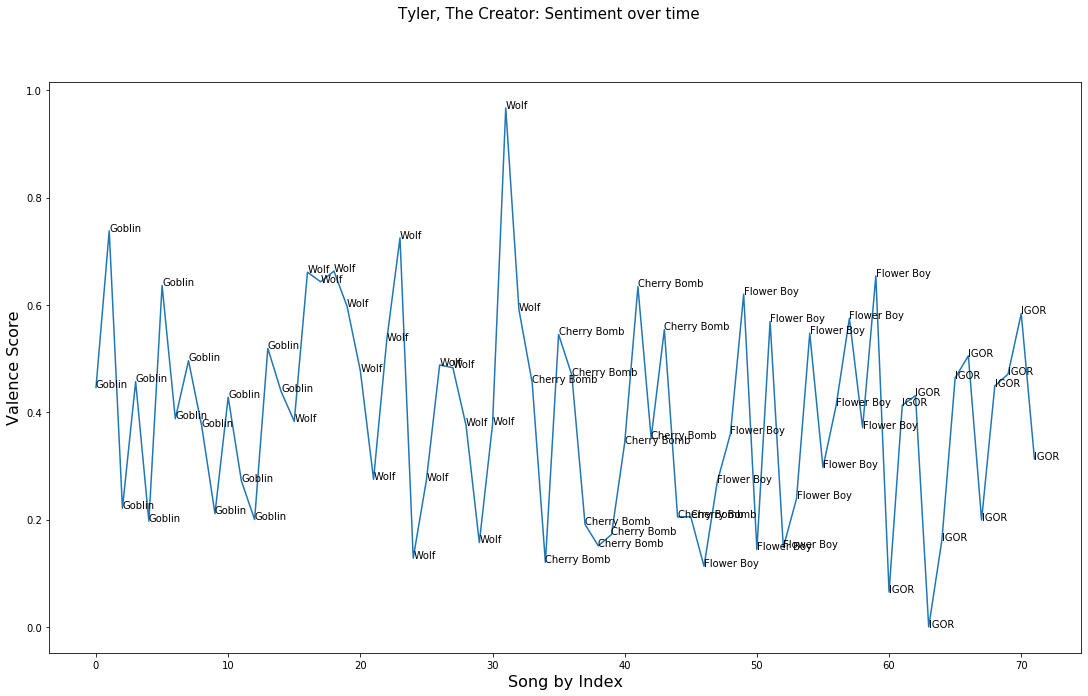

In [137]:
albums = list(pd.unique(final_df["album"]))
albums.reverse()

alb_n = []
v_scores = []

for x in albums:
    for track in final_df[final_df["album"]==x].iterrows():
        alb_n.append(track[1]['album'])
        v_scores.append(track[1]['valence'])

print (v_scores)
fig, ax = pyplot.subplots()
ax.plot(v_scores)

for i in range(len(v_scores)):
    ax.annotate(album[i],(i,v_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('Tyler, The Creator: Sentiment over time', fontsize=15)
pyplot.xlabel('Song by Index', fontsize=16)
pyplot.ylabel('Valence Score', fontsize=16)

Text(0, 0.5, 'Valence Scores')

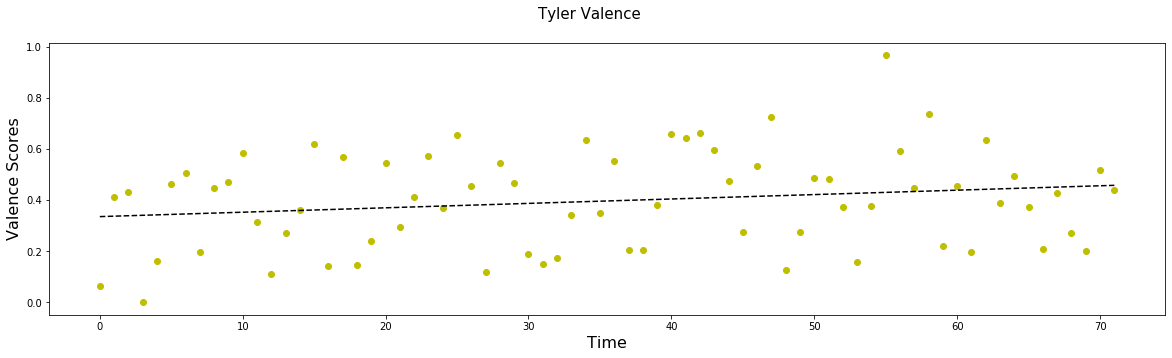

In [91]:
x = range(0,len(v_scores))
v_scores = list(final_df["valence"])

pyplot.figure(figsize=(20, 5))

coef = np.polyfit(x,v_scores,deg=1)
poly1d_fn = np.poly1d(coef) 

pyplot.plot(x,v_scores, 'yo', x, poly1d_fn(x), '--k')

fig = pyplot.gcf()

fig.suptitle('Tyler Valence', fontsize=15)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Valence Scores', fontsize=16)

In [90]:
stat_lst = []
stat_lst = [slope, intercept, r_value, p_value, std_err] = stats.linregress(x, v_scores)
r_sq = stat_lst[2]**2
print(r_sq)

stat_lst

0.0356898742127891


LinregressResult(slope=0.0017243102450318348, intercept=0.3359092085235921, rvalue=0.18891763870213152, pvalue=0.11198999902903517, stderr=0.0010712781411901958)

# Sentiment Stuff

In [481]:
def match(song1,complete):
    check=[]
    for x in complete:
        if song1 in x["title"]:
            check.append(x["title"])
        
    if (check):
        return min(check, key=len) 
    else:
        return check[0]
#     song2="".join((char for char in song2 if char not in string.punctuation))
#     song1="".join((char for char in song1 if char not in string.punctuation))
#     song1=song1.split()
#     song2=song2.split()
#     intersect =set(song1).intersection(set(song2))
#     if len(set(song1))==len(set(song2)):
#         return song1
#     song2="".join((char for char in song2 if char not in string.punctuation))

In [306]:
match("3005",complete_sentiment)

IndexError: list index out of range

In [307]:
"III. Telegraph Ave. ('Oakland' by Lloyd)"

"III. Telegraph Ave. ('Oakland' by Lloyd)"

In [308]:
'III Telegraph Ave ”Oakland” by Lloyd'

'III Telegraph Ave ”Oakland” by Lloyd'

In [309]:
s='3005'
s1="'Secret Track V 3005  Beach Picnic Version'"

In [310]:
match("III. Telegraph Ave. ('Oakland' by Lloyd)",'III Telegraph Ave ”Oakland” by Lloyd')

TypeError: string indices must be integers

In [50]:
# top 10 songs 
# go through the dictionary and create a counter of the top10 songs tokens


from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot
import json
from collections import defaultdict
import os
import fnmatch
import numpy as np
from datetime import datetime

In [51]:
def find_all(name, path):
    l={}
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
#             print (filename)
#             print (load_album("../"+filename)[0]['release_date'])
            l[filename]=load_album("../male_lyrics/"+filename)[0]['release_date']
#     sorted_songs_artist = sorted(l, key=lambda x: x["release_date"])    
    l={k: v for k, v in sorted(l.items(), key=lambda item: item[1])}
    print (list(l.keys()))
    sortedl=list(l.keys())
    return sortedl

In [52]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [53]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [381]:
word_weights = load_word_weights("bingliu.csv")

In [382]:
# import pandas as pd
# data = pd.read_csv("top10.csv")

import csv

from collections import defaultdict

top10dict=defaultdict(list)
input_file = csv.DictReader(open("top10.csv"))
for row in input_file:
    top10dict[row["author"]].append({"album":row["album"],"song":row["song"],"year":row["year"],"list_count":row["listen_count"]})

In [383]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            if album in ['Get Well Soon...','Kon the Louis Vuitton Don','I’m Good']:
#                 print (album)
                album="The College Dropout"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            elif album in ['Can’t Tell Me Nothing']:
#                 print (album)
                album="Late Registration"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            else:
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
    return paragraphs

In [387]:
filenames=find_all("Tyler,","../male_lyrics")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [388]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../male_lyrics")
    
    
    for file in filenames:
         complete.extend(load_album("../male_lyrics/"+file))
      
    
    return complete

In [392]:
complete_sentiment=load_artist("Tyler,")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [393]:
complete_sentiment

[{'title': 'Bastard',
  'album': 'Bastard',
  'text': 'Yo, fuck 2DopeBoyz and fuck Nah Right\nAnd any other fuck-nigga-ass blog that can\'t put an 18 year old nigga\nMaking his own fucking beats, covers, videos and all that shit\nFuck you post-Drake-ass cliche-jerking, LA-slauson rapping\nFuck-nigga-ass Hypebeast niggas, now back to the album\n\nWell, Tyler, hi, I\'m Dr. TC and um, I\'m guessing that your teacher sent you here to talk \'cause you were misbehaving\nUm, it\'s gonna be three sessions: today, tomorrow, and the next day\nSo, just tell me something about yourself...\nWell, look, if you don\'t talk, I mean, these sessions are going to go slower\n\nThis is what the devil plays before he goes to sleep\nSome food for thought? This food for death, go ahead and fucking eat\nMy father\'s dead, well I don\'t know, we\'ll never fucking meet\nI cut my wrist and play piano cause I\'m so depressed\nSomebody call the pastor, this bastard is so possessed\nThis meeting just begun, nigga I\

In [456]:
import string
top10={}



# print (top10dict)
for x in final_df.iterrows():
#     print (x[1]['name'])
    for y in complete_sentiment:
#         print (y)
#         y['title']= "".join((char for char in y['title'] if char not in string.punctuation))
#         x[1]['name']="".join((char for char in x[1]['name'] if char not in string.punctuation))
        y['title']=re.sub('[\W_]+', '', y['title']) 
        x[1]['name']=re.sub('[\W_]+', '', x[1]['name'])
#         print (y['title'].lower())
#         print (x[1]['name'].lower())
        if  y['title'].lower() in x[1]['name'].lower():
#             print (x[1]["name"])
            y['popularity']=x[1]["popularity"]
            y['valence']=x[1]['valence']
            if x[1]["name"] not in top10:
                top10[y['title'].lower()]=y


In [461]:
# print (list(final_df["name"]))
# print ([re.sub('[\W_]+', '', x).lower() for x in list(final_df["name"])] )
# for x in top10:  
#     print (x['title'].lower())
    
del top10['run']

10
[72 72 73 73 73 74 75 77 80 86]


array([ 0.07883817, -0.01541426, -0.00169205,  0.00866551,  0.00380228,
       -0.03366059, -0.02325581, -0.01932367, -0.01091703, -0.04155844])

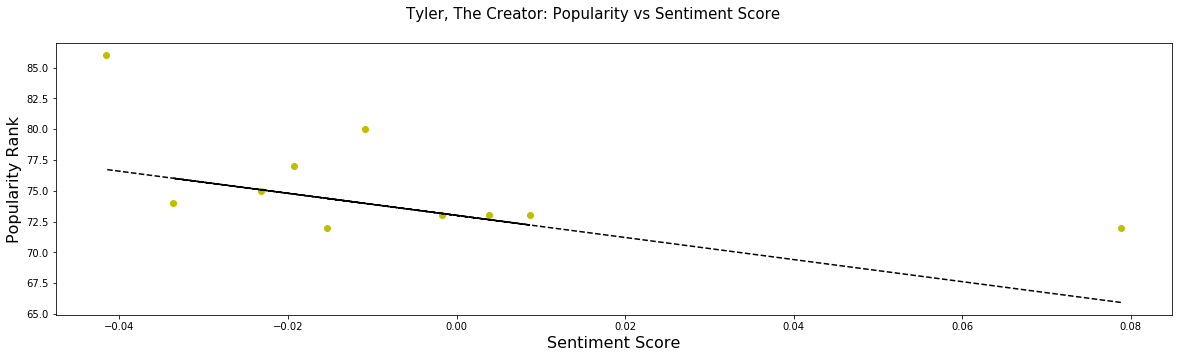

In [478]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10.values(), key=lambda x: int(x["popularity"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (len(sorted_songs_artist))
play_count = numpy.array([x['popularity'] for x in sorted_songs_artist])
print (play_count)
# new1=numpy.delete(play_count, np.argmax(play_count))
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
# new2=numpy.delete(score_count, np.argmax(score_count))
pyplot.figure(figsize=(20, 5))
# pyplot.scatter(play_count,score_count)

coef = np.polyfit(new2,new1,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

pyplot.plot(score_count,play_count, 'yo', score_count, poly1d_fn(score_count), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)
# pyplot.show()
# score_count
fig = pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
fig.suptitle('Tyler, The Creator: Popularity vs Sentiment Score ', fontsize=15)
pyplot.xlabel('Sentiment Score', fontsize=16)
pyplot.ylabel('Popularity Rank', fontsize=16)
score_count

10
[72 72 73 73 73 74 75 77 80 86]
[0.464 0.144 0.505 0.471 0.162 0.297 0.239 0.431 0.62  0.413]


array([0.464, 0.144, 0.505, 0.471, 0.162, 0.297, 0.239, 0.431, 0.62 ,
       0.413])

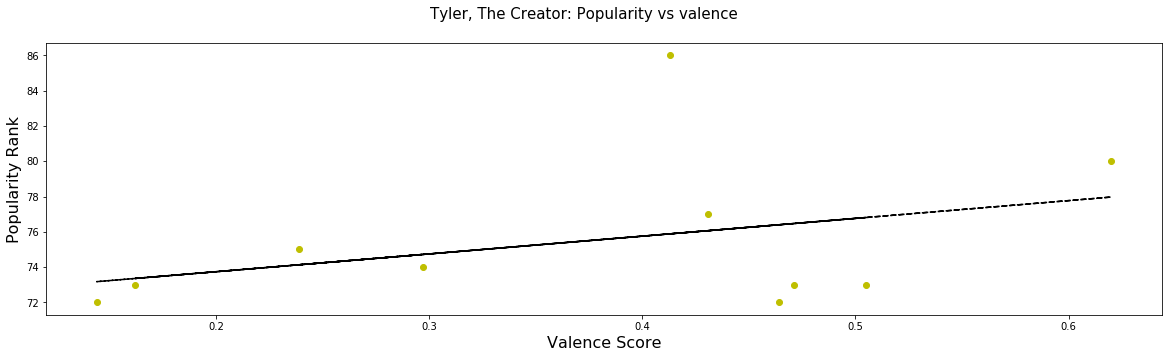

In [477]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10.values(), key=lambda x: int(x["popularity"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (len(sorted_songs_artist))
play_count = numpy.array([x['popularity'] for x in sorted_songs_artist])
album = numpy.array([p["album"] for p in sorted_songs_artist])
title = numpy.array([p["title"] for p in sorted_songs_artist])

print (play_count)
score_count = numpy.array([x['valence'] for x in sorted_songs_artist])
print (score_count)

from matplotlib.pyplot import figure
# fig, ax = pyplot.subplots()
pyplot.figure(figsize=(20, 5))
# pyplot.scatter(play_count,score_count)

coef = np.polyfit(score_count,play_count,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

pyplot.plot(score_count,play_count, 'yo', score_count, poly1d_fn(score_count), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)

# for i in range(len(score_count)):
# #     if album[i]!=album[i-1]:
#     ax.annotate(title[i],(i,score_count[i]))
fig = pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
fig.suptitle('Tyler, The Creator: Popularity vs Valence ', fontsize=15)
pyplot.xlabel('Valence Score', fontsize=16)
pyplot.ylabel('Popularity Rank', fontsize=16)
score_count

In [469]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('A$AP Rocky: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

{'earfquake': {'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (